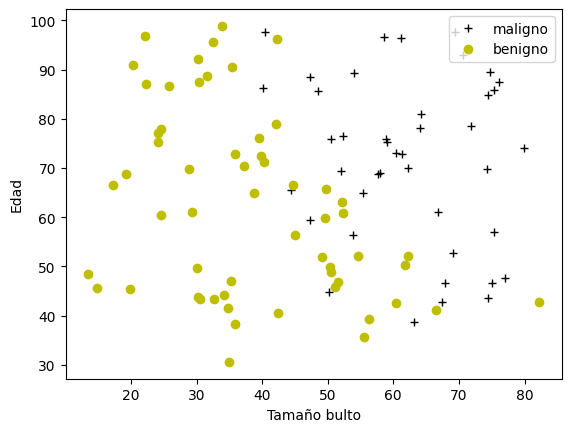

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

# Carga base de datos
X_train, y_train = load_data("data/ex2data1.txt")

# Grafico datos
plot_data(X_train, y_train[:], pos_label="maligno", neg_label="benigno")

# Set the y-axis label
plt.ylabel('Edad') 
# Set the x-axis label
plt.xlabel('Tamaño bulto') 
plt.legend(loc="upper right")
plt.show()

In [2]:
def sigmoid(z):
    """
    calcula la funcion de sigmoid
    Argumento:
        z (ndarray): Un escalar, numpy array.
    Retorna:
        g (ndarray): sigmoid(z), con el misma forma de z       
    """     
    g = 1/(1+np.exp(-z))  
    return g

def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    total_cost = cost / m

    return total_cost

def compute_gradient(X, y, w, b, *argv): 
    """
   Calcula gradiente para regresión logística
     Argumentos:
      X : (ndarray Shape (m,n)) datos, m ejemplos por n características
      y : (ndarray Shape (m,))  vaorl objetivo 
      w : (ndarray Shape (n,))  valores de los parámetros del modelo      
      b : (scalar)              valor de parametro bias del modelo  
    Retorna
      dj_dw : (ndarray Shape (n,)) El gradient del coste w.r.t. del parametro w. 
      dj_db : (scalar)             TEl gradient del coste w.r.t. del parametro b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m    
      
    return dj_db, dj_dw

In [3]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Realiza un descenso de gradiente por lotes para aprender. Actualiza theta tomando
     num_iters pasos de gradiente con tasa de aprendizaje alfa
    
     Argumentos:
       X: (ndarray Forma (m, n) datos, m ejemplos por n características
       y : (Forma ndarray (m,)) valor objetivo
       w_in: (ndarray Shape (n,)) Valores iniciales de los parámetros del modelo
       b_in : (escalar) Valor inicial del parámetro del modelo
       cost_function: función para calcular el costo
       gradient_function: función para calcular el gradiente
       alfa: (flotante) Tasa de aprendizaje
       num_iters: (int) número de iteraciones para ejecutar el descenso de gradiente
       lambda_: constante de regularización (escalar, flotante)
      
     Devoluciones:
       w : (ndarray Shape (n,)) Valores actualizados de los parámetros del modelo
       b : (escalar) Valor actualizado del parámetro del modelo
    """
    
    # Número ejemplos aprendizaje
    m = len(X)
    
    # Array para guardar coste J y w's en cada iteración principalmente para gráficos
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calcular el gradiente y actualizar los parámetros.
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Actualizar parámetros usando w, b, alfa y gradiente
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Guarda coste J en cada iteración
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Muestra Coste a intervalos de 10 veces o tantas iteraciones si <10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            print("w:", w_in)
            print("b:", b_in)
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Algunas configuraciones de descenso de gradiente
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)


Iteration    0: Cost     1.74   
w: [0.02519879 0.03232216]
b: -7.999580373122924
Iteration 1000: Cost     0.34   
w: [0.10709923 0.03630082]
b: -8.013387580046194
Iteration 2000: Cost     0.34   
w: [0.10724409 0.03640458]
b: -8.02790557735744
Iteration 3000: Cost     0.34   
w: [0.10738854 0.03650799]
b: -8.042379745114232
Iteration 4000: Cost     0.34   
w: [0.10753258 0.03661108]
b: -8.056810337444622
Iteration 5000: Cost     0.34   
w: [0.10767623 0.03671383]
b: -8.071197606220487
Iteration 6000: Cost     0.34   
w: [0.10781948 0.03681626]
b: -8.085541801084327
Iteration 7000: Cost     0.34   
w: [0.10796234 0.03691836]
b: -8.099843169475314
Iteration 8000: Cost     0.34   
w: [0.1081048  0.03702013]
b: -8.114101956655185
Iteration 9000: Cost     0.34   
w: [0.10824687 0.03712159]
b: -8.128318405733614
Iteration 9999: Cost     0.34   
w: [0.10838841 0.03722262]
b: -8.142478604289222


In [ ]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Edad') 
# Set the x-axis label
plt.xlabel('Tamaño bulto') 
plt.legend(loc="upper right")
plt.show()

In [ ]:
def predict(X, w, b): 
    """
    Predice si la etiqueta es 0 o 1 usando la logística aprendida
     parámetros de regresión w
    
     Argumentos:
       X: (ndarray Shape (m,n)) datos, m ejemplos por n características
       w : (ndarray Shape (n,)) valores de los parámetros del modelo
       b : valor (escalar) del parámetro de sesgo del modelo

     Devoluciones:
       p : (ndarray (m,)) Las predicciones para X usando un umbral en 0,5
     """
    # número de ejemplos de entrenamiento
    m, n = X.shape   
    p = np.zeros(m)
   

    # Calcular la combinación lineal de características y parámetros.
    z = np.dot(X, w) + b

    # Aplicar la función sigmoidea para obtener probabilidades.
    probabilities = 1 / (1 + np.exp(-z))

    # Utilice la heurística de umbral para obtener predicciones finales (0 o 1)
    p = (probabilities >= 0.5).astype(int)

    return p
#Calcular la precisión en nuestro conjunto de entrenamiento
p = predict(X_train, w,b)
print('Precisión: %f'%(np.mean(p == y_train) * 100))

In [ ]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

In [ ]:
# EJEMPLO USO
# Características ejemplo
X_example = np.array([[76, 40]])

# Parametros del modelo
w = np.array([0.10838841, 0.03722262])
b = -8.142478604289222

# Predición
predicion = predict(X_example, w, b)

print("Predición para el ejemplo: Mujer de 76 años y bulto de 40 ", predicion)